In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow.keras.models import load_model


In [11]:
# Define paths for the dataset directories
base_dir = './data'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')


In [12]:
# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Only rescale for validation and test
val_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load images from the directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import Callback
import matplotlib.pyplot as plt
import numpy as np

class VisualizeBatch(Callback):
    def on_epoch_end(self, epoch, logs=None):
        # Get a batch of images and labels from the training set
        images, labels = next(train_generator)
        
        # Make predictions on the batch
        predictions = self.model.predict(images)
        
        # Display the first 5 images and their predictions
        plt.figure(figsize=(15, 5))
        for i in range(5):
            plt.subplot(1, 5, i+1)
            plt.imshow(images[i])
            true_label = "Pneumonia" if labels[i] == 1 else "Normal"
            predicted_label = "Pneumonia" if predictions[i] > 0.5 else "Normal"
            plt.title(f"True: {true_label}\nPred: {predicted_label}")
            plt.axis('off')
        plt.show()

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/stepstep - accuracy: 0.7723 - loss: 0.621


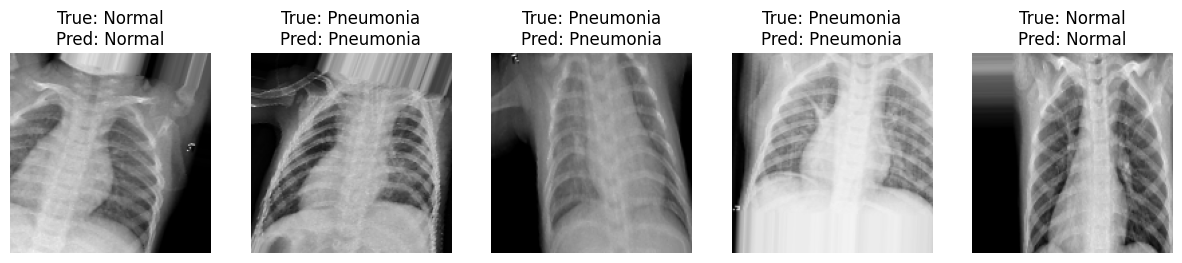

163/163 ━━━━━━━━━━━━━━━━━━━━ 81s 490ms/step - accuracy: 0.7725 - loss: 0.6203 - val_accuracy: 0.6875 - val_loss: 0.6501
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step/step - accuracy: 0.8472 - loss: 0.319


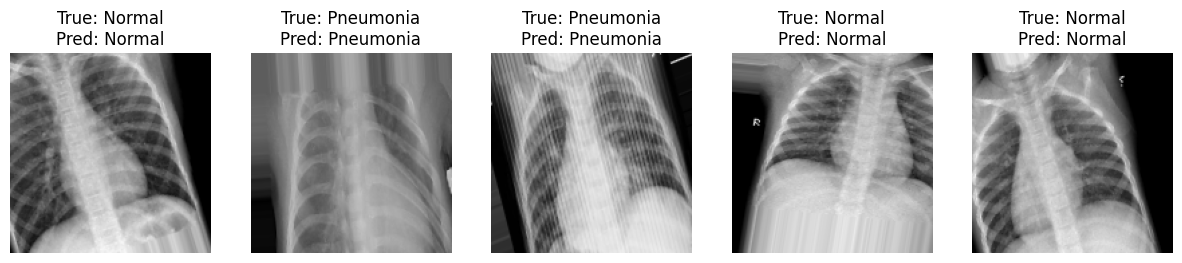

163/163 ━━━━━━━━━━━━━━━━━━━━ 77s 470ms/step - accuracy: 0.8473 - loss: 0.3189 - val_accuracy: 0.7500 - val_loss: 0.5296
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step/step - accuracy: 0.8637 - loss: 0.311


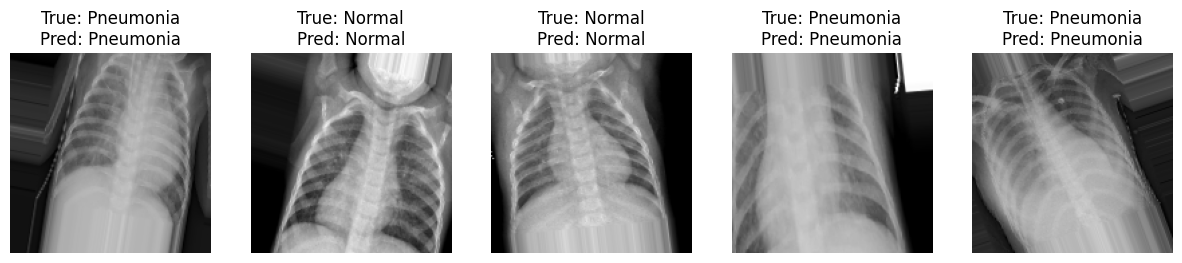

163/163 ━━━━━━━━━━━━━━━━━━━━ 75s 457ms/step - accuracy: 0.8638 - loss: 0.3111 - val_accuracy: 0.5625 - val_loss: 0.9489
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step/step - accuracy: 0.8954 - loss: 0.246


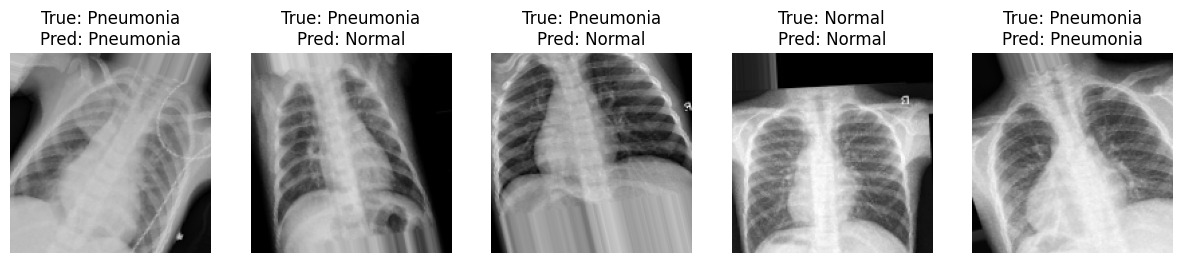

163/163 ━━━━━━━━━━━━━━━━━━━━ 73s 449ms/step - accuracy: 0.8954 - loss: 0.2469 - val_accuracy: 0.7500 - val_loss: 0.4907
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step/step - accuracy: 0.8939 - loss: 0.249


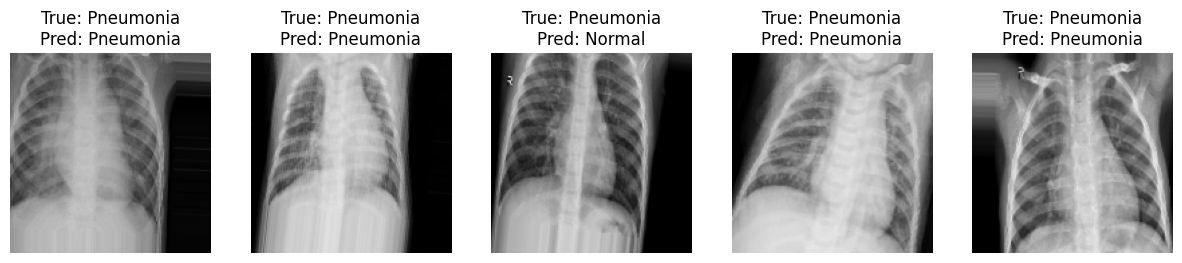

163/163 ━━━━━━━━━━━━━━━━━━━━ 73s 448ms/step - accuracy: 0.8939 - loss: 0.2492 - val_accuracy: 0.6250 - val_loss: 0.7765
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step/step - accuracy: 0.9045 - loss: 0.230


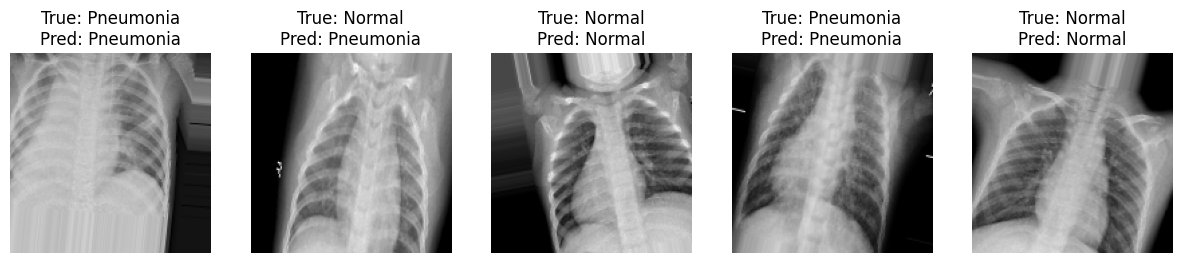

163/163 ━━━━━━━━━━━━━━━━━━━━ 73s 449ms/step - accuracy: 0.9045 - loss: 0.2306 - val_accuracy: 0.7500 - val_loss: 0.6526
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step/step - accuracy: 0.9166 - loss: 0.203


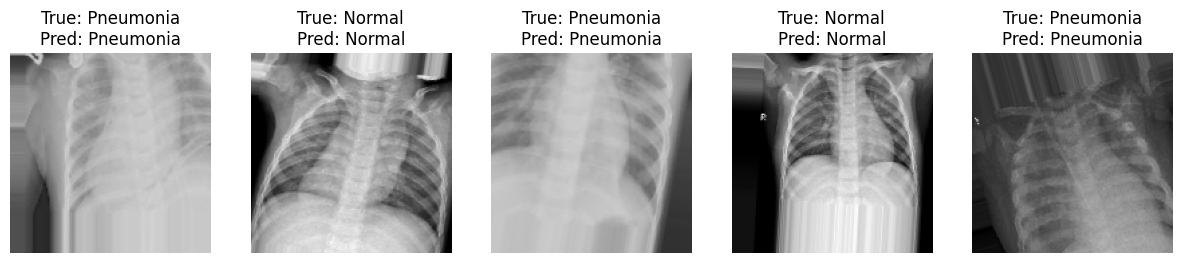

163/163 ━━━━━━━━━━━━━━━━━━━━ 74s 451ms/step - accuracy: 0.9166 - loss: 0.2031 - val_accuracy: 0.8750 - val_loss: 0.3782
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step/step - accuracy: 0.9089 - loss: 0.201


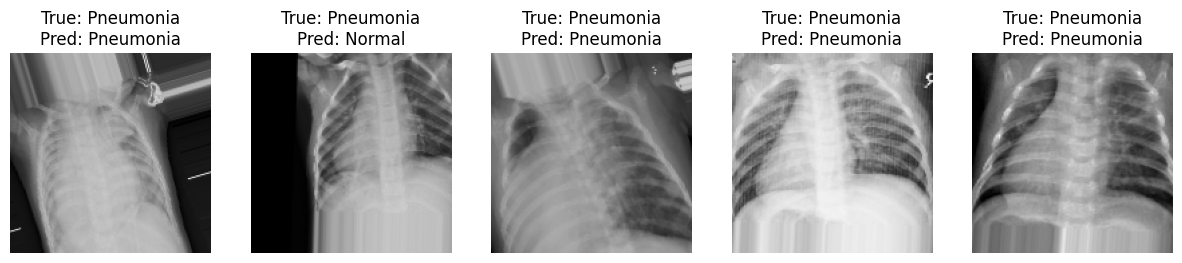

163/163 ━━━━━━━━━━━━━━━━━━━━ 73s 449ms/step - accuracy: 0.9089 - loss: 0.2012 - val_accuracy: 0.8750 - val_loss: 0.2826
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step/step - accuracy: 0.9144 - loss: 0.196


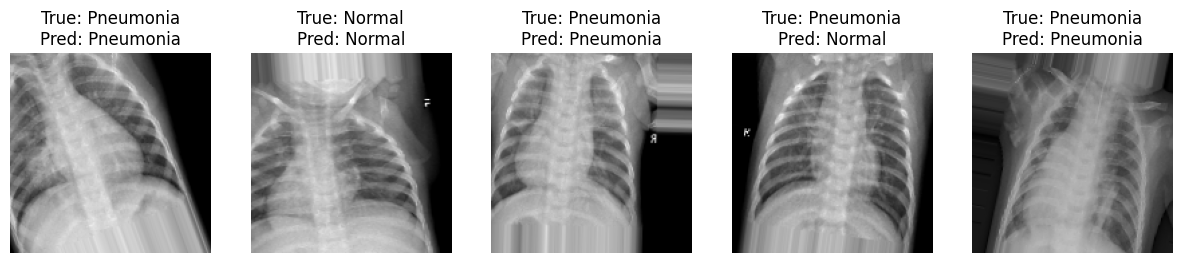

163/163 ━━━━━━━━━━━━━━━━━━━━ 73s 447ms/step - accuracy: 0.9143 - loss: 0.1967 - val_accuracy: 0.7500 - val_loss: 0.4866
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step/step - accuracy: 0.9184 - loss: 0.209


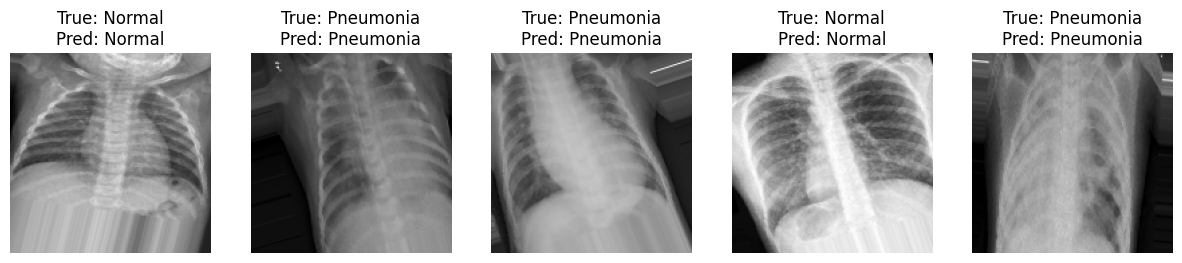

163/163 ━━━━━━━━━━━━━━━━━━━━ 75s 460ms/step - accuracy: 0.9184 - loss: 0.2090 - val_accuracy: 0.8125 - val_loss: 0.4056


In [15]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,  # You can adjust the number of epochs
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    callbacks=[VisualizeBatch()]
)

In [16]:
model.save('pneumonia_model.h5')

In [17]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc:.2f}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 180ms/step - accuracy: 0.8664 - loss: 0.3335
Test accuracy: 0.88


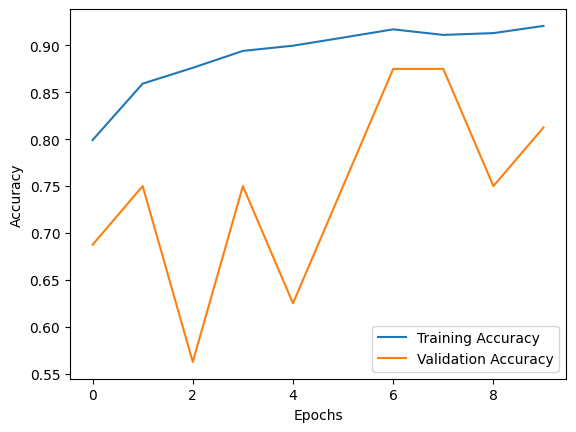

In [21]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history.get('val_accuracy', history.history.get('val_acc', [])), label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model = load_model("pneumonia_model.h5")
prediction = model.predict(Image)[0][0]